# CSCN8010 - Final Project 

## 	Sugakabiyrarosha And  Rajamani, Nivetha  

### Introduction to Face Recognition Using VGGFace
- In this project, we explore the fascinating domain of face recognition using a deep learning model called VGGFace. Face recognition is a classical problem in computer vision where the goal is to identify or verify individuals in images based on their facial features.
- This technology has wide applications, from security systems to social media platforms.

#### Objective of the Project
- The primary objective of our project is to develop a system that can recognize faces by comparing an input image to a dataset of known faces.
- Specifically, we aim to find the closest match to a given image from a set of celebrity images.
- This is achieved by leveraging the VGGFace model, a variant of the well-known VGG network that has been pre-trained on a large dataset of celebrity faces.

#### Understanding the VGGFace Model
- VGGFace is a deep convolutional neural network designed for face recognition tasks.
- It works by extracting features from an image, producing a high-dimensional vector (often referred to as an "embedding") that uniquely represents the face.
- These embeddings can then be compared to measure how similar two faces are.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from vggFaceModel import vgg_face
import pickle
from scipy.spatial.distance import cosine as distance
from scipy.spatial.distance import cosine

In [2]:
# Define the directory containing face images
base_dir_path = r"C:\Harosha\Conestoga\8010\Project\Data"

# Prepare the list of filenames
filenames = []
for actor in os.listdir(base_dir_path):
    actor_dir = os.path.join(base_dir_path, actor)
    if os.path.isdir(actor_dir):  # Check if it's a directory
        for file in os.listdir(actor_dir):
            file_path = os.path.join(actor_dir, file)
            filenames.append(file_path)

In [3]:
#for filename in filenames:
#    print(filename)

# Print the count of collected filenames
print(f"Total number of filenames collected: {len(filenames)}")

Total number of filenames collected: 10465


In [4]:
weights_path = 'C:\\Users\\haros\\Downloads\\vggFace\\vgg_face_weights.h5'
# Create the model and load the weights
model = vgg_face(weights_path)

# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 226, 226, 3)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 226, 226, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                        

### Model Architecture 

#### Input Layer:

- zero_padding2d_13: Adds padding to the input image to ensure that the subsequent convolutions have an appropriate spatial size. The input size is 224x224x3.

#### Convolutional Layers:

- conv2d_x layers: These layers apply convolution operations to extract features from the image. The network progressively increases the number of filters as you go deeper, which helps capture more complex features.
- Initial Layers (64 filters): Capture basic features such as edges and textures.
- Intermediate Layers (128, 256 filters): Capture more complex patterns.
- Deep Layers (512 filters): Capture high-level abstract features.

#### Max-Pooling Layers:

- max_pooling2d_x layers: Reduce the spatial dimensions (height and width) of the feature maps while keeping the most important information. This helps to decrease computational complexity and control overfitting.

#### Dropout Layers:

- dropout_x layers: Used for regularization to prevent overfitting by randomly dropping some units during training. This helps in improving the generalization of the model.

#### Fully Connected Layers:

- conv2d_x layers with 1x1 kernels: These layers are used to combine features learned by the convolutional layers into a final classification output. The number of neurons in these layers is quite high, allowing the model to learn a very rich set of features.
- flatten_1: Flattens the output of the previous convolutional layer into a 1D vector.

### Key Observations

#### Number of Parameters:

- Total Parameters: 145,002,878
- This is a large number, indicating a very deep and complex model. The large number of parameters suggests that this model can capture a wide variety of features but requires a lot of computational resources and may be prone to overfitting if not handled properly.

#### Layer Details:

- Padding: Zero padding is used extensively to maintain the spatial dimensions throughout the network, ensuring that the convolution operations do not reduce the feature map size prematurely.
- Kernel Sizes: The convolutional layers use 3×3 kernels, which is a standard choice in VGG-style networks, allowing the model to learn spatial hierarchies effectively.
- Final Layers: The model ends with a large number of filters in the last convolutional layer (2622), which might indicate a specific application or a large number of classes/outputs.

#### Model Depth:

- Depth of Convolutions: The model has multiple convolutional layers (29 layers), including the dropout layers and fully connected layers. This depth is typical for VGG-style architectures and is designed to capture detailed hierarchical features from the input images.

In [5]:
layer = model.layers[3]
filters, biases = layer.get_weights()
print(layer.name, filters.shape)
print(layer.name, biases.shape)

conv2d_1 (3, 3, 64, 64)
conv2d_1 (64,)


#### Layer Type:
- The layer is likely a 2D convolutional layer (Conv2D) given the names and shapes.

#### Filter Shape:

- (3, 3, 64, 64): This indicates that the convolutional layer has 64 filters, each with a size of 3x3, and each filter operates over 64 input channels.
- 3x3: The spatial dimensions (height and width) of the filter.
- 64: The number of input channels (depth) each filter expects. This means the input to this layer has 64 channels.
- 64: The number of output channels (depth) of the layer, corresponding to the number of filters.

#### Bias Shape:

- (64,): This means there is one bias term for each filter in the layer. Since there are 64 filters, there are 64 bias terms, one per filter.

#### Summary
- The convolutional layer has a set of 64 filters, each of size 3x3, which operate on an input with 64 channels.
- Each filter has its own bias term, so there are 64 bias terms in total.

In [6]:
def reshapeImage(path):
    im = Image.open(path)
    im = im.resize((224,224))
    im = np.array(im).astype(np.float32) / 255
    im = np.expand_dims(im, axis=0)
    return im

##### Image Loading and Resizing: 
- This function opens an image from a given path, resizes it to 224x224 pixels, and converts it into a numpy array.
##### Normalization: 
- The pixel values are normalized to the range [0, 1] by dividing by 255.
##### Adding Batch Dimension: 
- np.expand_dims(im, axis=0) adds a batch dimension, making the array shape (1, 224, 224, 3), which is suitable for model input.

In [7]:
def img_to_encoding(path):
    im = reshapeImage(path)
    out = model.predict(im)
    return out

##### Image Preprocessing: 
- This function preprocesses the image by calling reshapeImage(path).
##### Model Prediction: 
- It then uses the preprocessed image to get an encoding (feature representation) from the model.

In [8]:
def distance(encoding1, endcoding2):
    return np.linalg.norm(encoding1 - endcoding2)

##### Euclidean Distance: 
- This function computes the Euclidean distance between two encodings, which measures the dissimilarity between them. The smaller the distance, the more similar the encodings are.

In [9]:
def triplet_loss(anchor, postive, negative, margin=0.2):
    loss = (distance(anchor, postive)**2) - (distance(anchor, negative)**2) + margin
    loss = max(loss, 0)
    return loss

##### Triplet Loss Calculation: 
- This function calculates the triplet loss for a given anchor, positive, and negative encoding. The goal of the triplet loss is to ensure that the distance between the anchor and positive is smaller than the distance between the anchor and negative by at least the margin.
##### Margin: 
- The margin parameter ensures that the positive sample is closer to the anchor than the negative sample by at least this margin.
##### Clamping: 
- max(loss, 0) ensures that the loss is non-negative

In [10]:
def find_closest(database, encoding):
    lowest_similarity = 100
    closest_person = None
    for person in database:
        current_similarity = distance(person['encoding'], encoding)
        if current_similarity < lowest_similarity:
            closest_person = person
            lowest_similarity = current_similarity
    return closest_person

##### Finding the Closest Match: 
- This function iterates through a database of people, each with an associated encoding. It calculates the distance between each person’s encoding and the given encoding.
##### Closest Person:
- It tracks and returns the person with the smallest distance (i.e., the closest match) to the given encoding

In [11]:
def img_to_encoding(path, model):
    im = reshapeImage(path)
    out = model.predict(im)
    return out

##### Functionality: 
- This function takes an image file path and a model as input.
##### Image Preprocessing: 
- It calls reshapeImage(path) to preprocess the image.
##### Model Prediction: 
- The preprocessed image is then passed to the model.predict(im) method, which generates an encoding or feature vector from the model.
##### Return Value: 
- The function returns the encoding produced by the model.

In [12]:
def reshapeImage(path):
    im = Image.open(path).convert('RGB')  # Convert image to RGB
    im = im.resize((224, 224))
    im = np.array(im).astype(np.float32) / 255
    im = np.expand_dims(im, axis=0)  # Add batch dimension
    return im

##### Image Conversion: 
- Image.open(path).convert('RGB') ensures that the image is in RGB mode. 
- This is important for consistent input to models that expect RGB images
##### Image Resizing: 
- The image is resized to 224x224 pixels, a common input size for many pre-trained models.
##### Normalization: 
- The pixel values are normalized to the [0, 1] range by dividing by 255, which is a common practice to match the input requirements of most neural networks.
##### Batch Dimension: 
- np.expand_dims(im, axis=0) adds a batch dimension to the image array, resulting in a shape of (1, 224, 224, 3). 
- This format is required for passing the image to the model, which typically expects a batch of images as input.

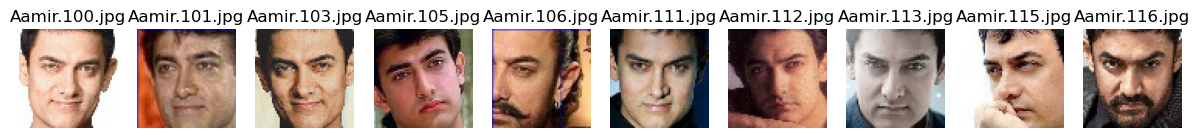

In [13]:


def plot_example_images(base_dir_path, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    axes = axes.flatten()
    filenames = [os.path.join(base_dir_path, actor, file) for actor in os.listdir(base_dir_path) for file in os.listdir(os.path.join(base_dir_path, actor))][:num_images]
    
    for ax, file_path in zip(axes, filenames):
        img = Image.open(file_path)
        ax.imshow(img)
        ax.set_title(os.path.basename(file_path))
        ax.axis('off')
    
    plt.show()

# Plot a few example images from your dataset
plot_example_images(base_dir_path)


In [20]:
# Prepare names and encodings
encodings = []

for file_path in filenames:
    try:
        # Extract the name from the file path
        name = os.path.basename(file_path).strip('.jpg').replace('-', ' ')
        encoding = img_to_encoding(file_path, model)
        encodings.append({
            "name": name,
            "path": file_path,
            "encoding": encoding
        })
    except FileNotFoundError as e:
        print(f"Error: {e}. Check if the file exists at {file_path}")

# Store encodings in a pickle file
with open('encodings.pkl', 'wb') as f:
    pickle.dump(encodings, f)

print("Encodings stored in 'encodings.pkl'")


1/1 [==============================] - 2s 2s/step
Encodings stored in 'encodings.pkl'


##### Functionality: 
- The code processes a list of image file paths, extracts names and encodings for each image, and stores the results in a pickle file.
##### Error Handling: 
- Includes basic error handling to manage missing files.
##### Serialization: 
- Uses pickle to save the list of encodings, which facilitates persistent storage and later retrieval of the data.

In [14]:
def find_closest(encodings, target_encoding):
    target_encoding = target_encoding.flatten()  # Flatten the target encoding
    closest_similarity = float('inf')
    closest_person = None
    
    for person in encodings:
        person_encoding = person['encoding'].flatten()  # Flatten the person's encoding
        sim = cosine(person_encoding, target_encoding)
        if sim < closest_similarity:
            closest_similarity = sim
            closest_person = person
            
    return closest_person

##### Flattening: 
- target_encoding.flatten() and person['encoding'].flatten() are used to ensure that the encodings are 1-dimensional arrays.
- This is necessary if the encodings are multi-dimensional arrays, as many similarity functions expect 1D vectors.
##### Initialization: 
- closest_similarity is initialized to positive infinity (float('inf')) to ensure that any valid similarity score will be smaller.
##### Cosine Similarity: 
- The code uses cosine(person_encoding, target_encoding) to compute the similarity.
- Note: Cosine similarity measures the cosine of the angle between two vectors. 
##### Finding Closest Match: 
- The loop iterates through the encodings list, and updates closest_person with the person having the smallest similarity score.
##### Return: 
- Returns the person from the encodings list who has the encoding closest to the target_encoding.

In [15]:
def plot_images(paths):
    f, axarr = plt.subplots(1, len(paths))
    for i in range(len(paths)):
        axarr[i].imshow(Image.open(paths[i]))
    plt.show()

##### Creating Subplots: 
- plt.subplots(1, len(paths)) creates a single row of subplots with len(paths) columns. Each subplot will display one of the images.
##### Displaying Images: 
- The for loop iterates through the paths, opens each image using Image.open(paths[i]), and displays it on the corresponding subplot.
##### Showing Plot: 
- plt.show() displays the figure with the plotted images.

1/1 [==============================] - 0s 471ms/step


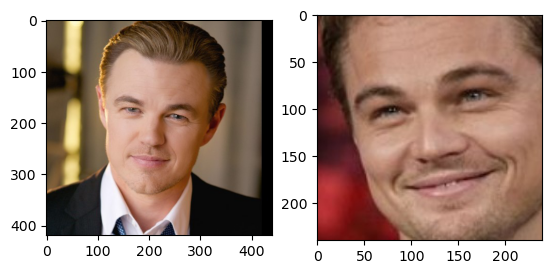

Found 037_fe4d2d8f with 0.57 similarity


In [16]:
# Load encodings from the pickle file
with open('encodings.pkl', 'rb') as f:
    encodings = pickle.load(f)

input_img_path = r'C:\Users\haros\Downloads\Look Alike 6.jpg'
input_encoding = img_to_encoding(input_img_path, model).flatten()  # Flatten the input encoding

closest_person = find_closest(encodings, input_encoding)
closest_similarity = 1 - distance(closest_person['encoding'].flatten(), input_encoding)  # Flatten both encodings

# Plot the input image and the closest match
plot_images([input_img_path, closest_person['path']])

print(f"Found {closest_person['name']} with {closest_similarity:.2f} similarity")


1/1 [==============================] - 0s 144ms/step


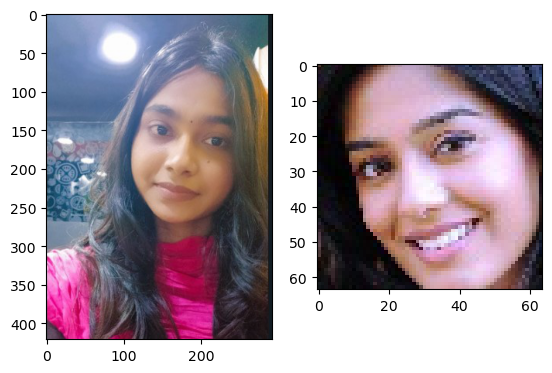

Found Amrita_Rao.192 with 0.32 similarity


In [19]:
input_img_path = r'C:\Users\haros\Downloads\Look Alike 5.jpg'
input_encoding = img_to_encoding(input_img_path, model).flatten()  # Flatten the input encoding

closest_person = find_closest(encodings, input_encoding)
closest_similarity = 1 - distance(closest_person['encoding'].flatten(), input_encoding)  # Flatten both encodings

# Plot the input image and the closest match
plot_images([input_img_path, closest_person['path']])

print(f"Found {closest_person['name']} with {closest_similarity:.2f} similarity")

##### Loading: 
- Loads previously computed image encodings from a pickle file.
##### Processing: 
- Computes the encoding for a new input image.
##### Matching: 
- Finds the closest match in the database by comparing encodings.
##### Visualization: 
- Plots the input image and its closest match.
##### Output: 
- Provides the name of the closest match and its similarity score.

In [ ]:
import seaborn as sns

def plot_encoding_heatmap(encodings):
    names = [person['name'] for person in encodings]
    num_encodings = len(encodings)
    distances = np.zeros((num_encodings, num_encodings))

    for i in range(num_encodings):
        for j in range(num_encodings):
            distances[i, j] = distance(encodings[i]['encoding'].flatten(), encodings[j]['encoding'].flatten())

    plt.figure(figsize=(10, 8))
    sns.heatmap(distances, xticklabels=names, yticklabels=names, cmap='coolwarm', annot=True)
    plt.title('Face Encoding Distance Heatmap')
    plt.show()

# Plot the heatmap of face encoding distances
plot_encoding_heatmap(encodings)


In [21]:
def plot_retrieval_results(input_img_path, closest_person, encodings, model, num_candidates=5):
    # Get the encoding for the input image
    input_encoding = img_to_encoding(input_img_path, model).flatten()

    # Sort encodings by distance to the input image encoding
    candidates = sorted(encodings, key=lambda x: distance(x['encoding'].flatten(), input_encoding))[:num_candidates]

    # Create a list of image paths including the closest match and candidates
    image_paths = [input_img_path] + [closest_person['path']] + [person['path'] for person in candidates]

    # Plot the images
    f, axarr = plt.subplots(1, len(image_paths), figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        axarr[i].imshow(Image.open(img_path))
        axarr[i].set_title(os.path.basename(img_path))
        axarr[i].axis('off')

    plt.show()

##### Encoding Calculation: 
- Computes the encoding of the input image and flattens it.
##### Sorting: 
- Finds and sorts the most similar images to the input image.
##### Visualization: 
    - Plots the input image, its closest match, and several candidate images in a single row for comparison.

In [ ]:
with open('encodings.pkl', 'rb') as f:
    encodings = pickle.load(f)

input_img_path = r'C:\Users\haros\Downloads\Look Alike 6.jpg'
input_encoding = img_to_encoding(input_img_path, model).flatten()  # Flatten the input encoding

closest_person = find_closest(encodings, input_encoding)
closest_similarity = 1 - distance(closest_person['encoding'].flatten(), input_encoding)  # Flatten both encodings

# Plot the input image and the closest match along with a few candidates
plot_retrieval_results(input_img_path, closest_person, encodings, model)

print(f"Found {closest_person['name']} with {closest_similarity:.2f} similarity")


1/1 [==============================] - 0s 118ms/step


##### Encodings Loading: 
- Retrieves image encodings from a pickle file.
##### Image Encoding: 
- Computes and flattens the encoding of the input image.
##### Closest Match: 
- Finds and computes the similarity of the closest matching image from the encodings.
##### Visualization: 
- Plots the input image, the closest match, and additional candidates.
##### Result Output: 
Displays the name and similarity of the closest match.

In [ ]:
def plot_similarity_distribution(encodings):
    similarities = []
    num_encodings = len(encodings)
    
    for i in range(num_encodings):
        for j in range(num_encodings):
            if i != j:
                sim = 1 - distance(encodings[i]['encoding'].flatten(), encodings[j]['encoding'].flatten())
                similarities.append(sim)

    plt.figure(figsize=(10, 6))
    plt.hist(similarities, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Similarity Scores')
    plt.xlabel('Similarity')
    plt.ylabel('Frequency')
    plt.show()

# Plot the distribution of similarity scores
plot_similarity_distribution(encodings)


##### Compute Similarities: 
- The function calculates similarity scores between all pairs of image encodings, excluding self-comparisons.
##### Distribution Plot: 
- Visualizes the distribution of these similarity scores using a histogram.

Reference: 
----------
For This Code we have taken the Reference and used the models from the below links 

Pretrained model : 

o	https://gist.github.com/EncodeTS/6bbe8cb8bebad7a672f0d872561782d9

Weights:

o	https://www.kaggle.com/datasets/vincentscheltjens/vgg-face-weightsh5

Datasets:

o	https://www.kaggle.com/datasets/bhaveshmittal/celebrity-face-recognition-dataset

o	https://www.kaggle.com/datasets/sushilyadav1998/bollywood-celeb-localized-face-dataset?select=Bollywood_celeb_face_localized 

Code Reference: 

o	https://www.youtube.com/watch?v=X67rclJcIL0&list=PLKnIA16_RmvY5eP91BGPa0vXUYmIdtfPQ&index=17